### Repeat the above exercise on suitable images of your choice.

In [20]:
%matplotlib inline

import cv2
import numpy as np
from matplotlib import pyplot as plt
import math

In [45]:
i1 = './A2_resources/box.png'

img1 = cv2.imread(i1)
img1 = img1.astype(np.uint16)

In [46]:
def gauss2D(shape,sigma):
    m,n = [(ss-1)/2 for ss in shape]
    y,x = np.ogrid[-m:m+1,-n:n+1]
    h = np.exp( -(x*x + y*y) / (2.*sigma*sigma) )
    h[ h < np.finfo(h.dtype).eps*h.max() ] = 0
    sumh = h.sum()
    if sumh != 0:
        h /= sumh
    
    return h

In [47]:
def im2col(A, block, stepsize=1):
    m,n = A.shape
    s0, s1 = A.strides    
    nrows = m-block[0]+1
    ncols = n-block[1]+1
    shp = block[0],block[1],nrows,ncols
    strd = s0,s1,s0,s1

    out_view = np.lib.stride_tricks.as_strided(A, shape=shp, strides=strd)
    return out_view.reshape(block[0]*block[1],-1)[:,::stepsize]

In [48]:
def conv(img, mat):
    a1, a2 = img.shape
    
    b1, b2 = mat.shape
    
    mat_f = np.array(mat.flatten())
    imcol = im2col(img, (a1-b1+1,a2-b2+1))
    x = np.multiply(imcol, mat_f)
    y = np.sum(x, axis = 1)
    y = y.reshape(a1-b1+1, a2-b2+1)
    
    return y

In [49]:
k = 3
a = gauss2D((3,3),1)

In [50]:
def func(img1, a, k):
    if len(img1.shape) == 2:
        gauss2 = conv(img1, a)
        img1 = img1[0:gauss2.shape[0], 0:gauss2.shape[1]]
        img2 = np.clip(((k+1)*img1 - (k)*gauss2), 0, 255)

        img1 = img1.astype(np.uint8)
        img2 = img2.astype(np.uint8)
    else:
        b, g, r = cv2.split(img1)
        img1 = cv2.merge((r,g,b))

        g_b = conv(b, a)
        g_g = conv(g, a)
        g_r = conv(r, a)

        r_b = b[0:g_b.shape[0], 0:g_b.shape[1]]
        s_b = np.clip(((k+1)*r_b - (k)*g_b), 0, 255)

        r_g = g[0:g_g.shape[0], 0:g_g.shape[1]]
        s_g = np.clip(((k+1)*r_g - (k)*g_g), 0, 255)

        r_r = r[0:g_r.shape[0], 0:g_r.shape[1]]
        s_r = np.clip(((k+1)*r_r - (k)*g_r), 0, 255)

        img2 = cv2.merge((s_r,s_g,s_b))

        img1 = img1.astype(np.uint8)
        img2 = img2.astype(np.uint8)
        
    return img1, img2

In [51]:
output = func(img1, a, k)

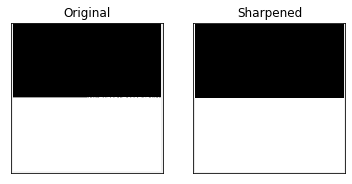

In [52]:
plt.subplot(121),plt.imshow(output[0])
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(output[1])
plt.title('Sharpened'), plt.xticks([]), plt.yticks([])
plt.show()